Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

Load the data

In [4]:
data = pd.read_csv('netflix_titles.csv')

Describe the data
The dataset consists of meta details about the movies and tv shows such as the title, director, and cast of the shows / movies. Details such as the release year, the rating, duration etc.

In [6]:
## This checks the first rows of the dataset
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
## This checks the last rows of the dataset
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
## Shows the total number of rows and columns
data.shape

(8807, 12)

In [10]:
## Shows the total number of columns for the dataset.
len(data.columns)

12

In [11]:
## Describes the different column named in the dataset.
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
## Describes the different data types
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Data Cleaning and Pre-processing

In [14]:
data['show_id'].value_counts().sum()

8807

In [15]:
## Check for null values
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [16]:
## Fill null values with unknown in director,cast and country 
data[['director', 'cast', 'country']] = data[['director', 'cast', 'country']].replace(np.nan, "Unknown ")

In [17]:
data = data[~(data['director'].str.contains('Unknown') | 
                      data['cast'].str.contains('Unknown') | 
                      data['country'].str.contains('Unknown'))]
print(f"Number of rows after cleaning: {data.shape[0]}")

Number of rows after cleaning: 5336


In [18]:
unknown_rows = data[(data['director'].str.contains('Unknown')) | 
                    (data['cast'].str.contains('Unknown')) | 
                    (data['country'].str.contains('Unknown'))]
print(unknown_rows)

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []


In [19]:
data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [20]:
## Check for null values
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          1
duration        3
listed_in       0
description     0
dtype: int64

In [21]:
## Check for duplicates
data.duplicated().sum()

0

In [22]:
data.nunique()

# Checks the unique dataset values.

show_id         5336
type               2
title           5336
director        3947
cast            5202
country          604
date_added      1454
release_year      72
rating            17
duration         198
listed_in        335
description     5325
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5336 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5336 non-null   object
 1   type          5336 non-null   object
 2   title         5336 non-null   object
 3   director      5336 non-null   object
 4   cast          5336 non-null   object
 5   country       5336 non-null   object
 6   date_added    5336 non-null   object
 7   release_year  5336 non-null   int64 
 8   rating        5335 non-null   object
 9   duration      5333 non-null   object
 10  listed_in     5336 non-null   object
 11  description   5336 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.9+ KB


In [24]:
# Change date from object to date/time
data['date_added']=data['date_added'].astype('datetime64[ms]')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5336 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5336 non-null   object        
 1   type          5336 non-null   object        
 2   title         5336 non-null   object        
 3   director      5336 non-null   object        
 4   cast          5336 non-null   object        
 5   country       5336 non-null   object        
 6   date_added    5336 non-null   datetime64[ms]
 7   release_year  5336 non-null   int64         
 8   rating        5335 non-null   object        
 9   duration      5333 non-null   object        
 10  listed_in     5336 non-null   object        
 11  description   5336 non-null   object        
dtypes: datetime64[ms](1), int64(1), object(10)
memory usage: 541.9+ KB


In [26]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


Data Visualization

In [28]:
data['type'].value_counts()

type
Movie      5189
TV Show     147
Name: count, dtype: int64

<Axes: xlabel='type'>

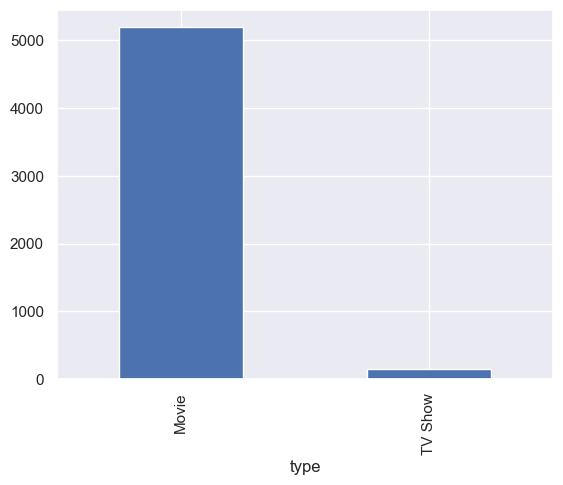

In [29]:
data['type'].value_counts().plot(kind='bar')

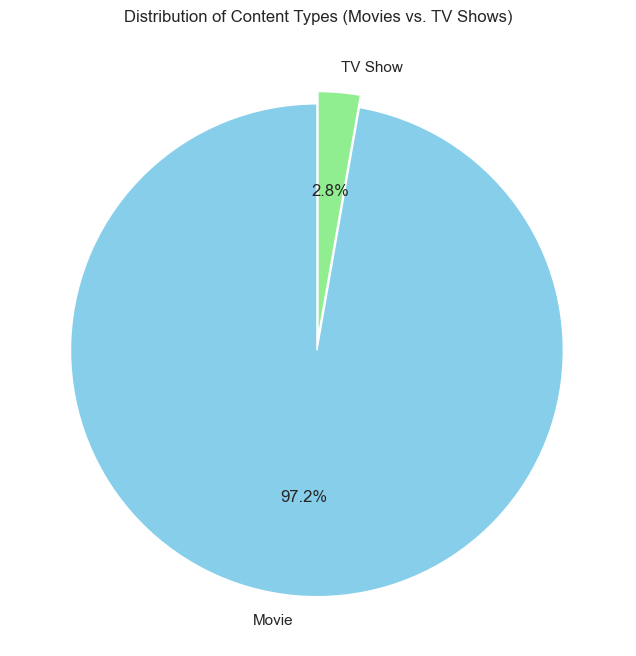

In [30]:
## Pie chart display
plt.figure(figsize=(8, 8))  
data['type'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%',  
    colors=['skyblue', 'lightgreen'], 
    startangle=90, 
    explode=(0.05, 0) 
)
plt.title('Distribution of Content Types (Movies vs. TV Shows)')
plt.ylabel('')
plt.show()

In [31]:
# A tabled comparison between country and type 
pd.crosstab(data.type, data.country)

country,", France, Algeria",Argentina,"Argentina, Brazil, France, Poland, Germany, Denmark","Argentina, Chile","Argentina, Chile, Peru","Argentina, France","Argentina, France, United States, Germany, Qatar","Argentina, Spain","Argentina, United States","Argentina, Uruguay, Serbia",...,"United States, United Kingdom, Spain, South Korea",Uruguay,"Uruguay, Argentina","Uruguay, Argentina, Germany, Spain","Uruguay, Argentina, Spain","Uruguay, Guatemala","Uruguay, Spain, Mexico",Venezuela,Vietnam,Zimbabwe
type,,,,,,,,,,,,,,,,,,,,,
Movie,1,34,1,2,1,1,1,7,1,1,...,1,2,1,1,1,1,1,1,7,1
TV Show,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Top 20 countries producing shows
data[data['type']=='TV Show']['country'].value_counts().head(20)

country
United States                      27
United Kingdom                     19
Japan                              10
South Korea                        10
Spain                               7
India                               7
Taiwan                              7
France                              5
Turkey                              5
Thailand                            5
Nigeria                             4
Brazil                              4
Canada                              3
United States, Canada               2
Denmark                             2
Italy                               2
China                               2
Belgium                             1
Russia                              1
Colombia, Mexico, United States     1
Name: count, dtype: int64

<Axes: xlabel='country'>

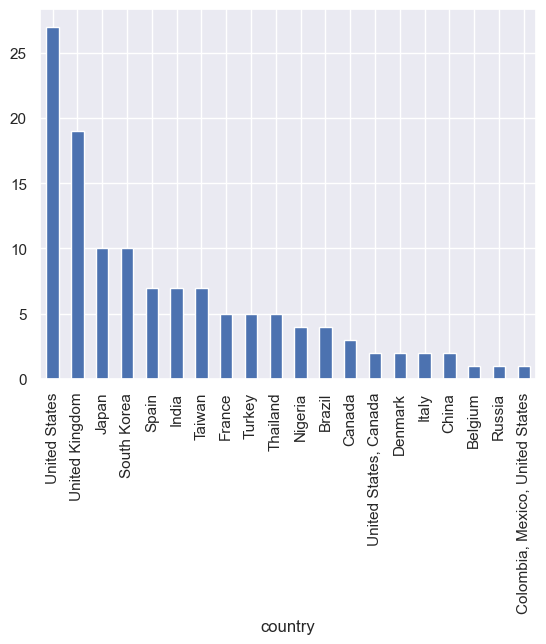

In [33]:
data[data['type']=='TV Show']['country'].value_counts().head(20).plot(kind='bar')

In [34]:
# Top 20 countries producing Movies
data[data['type']=='Movie']['country'].value_counts().head(20)

country
United States                    1822
India                             868
United Kingdom                    164
Canada                            104
Egypt                              90
Nigeria                            84
Spain                              84
Indonesia                          76
Turkey                             74
Philippines                        73
Japan                              73
France                             68
Mexico                             63
United Kingdom, United States      59
United States, Canada              50
Hong Kong                          49
Brazil                             42
Germany                            41
South Korea                        38
Thailand                           36
Name: count, dtype: int64

<Axes: xlabel='country'>

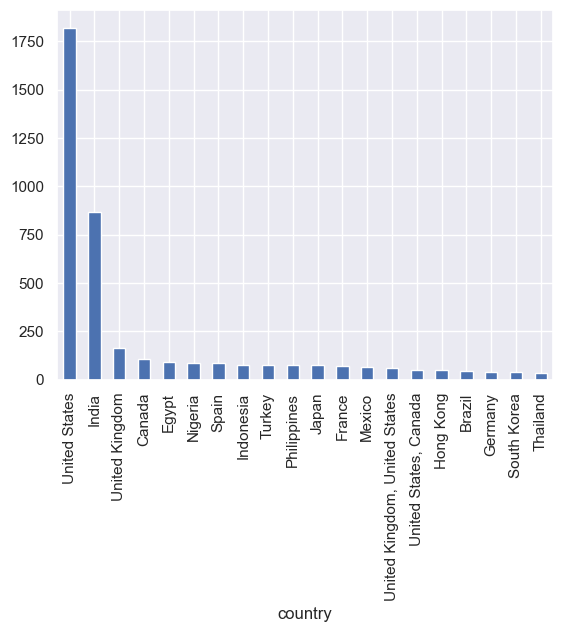

In [35]:
data[data['type']=='Movie']['country'].value_counts().head(20).plot(kind='bar')

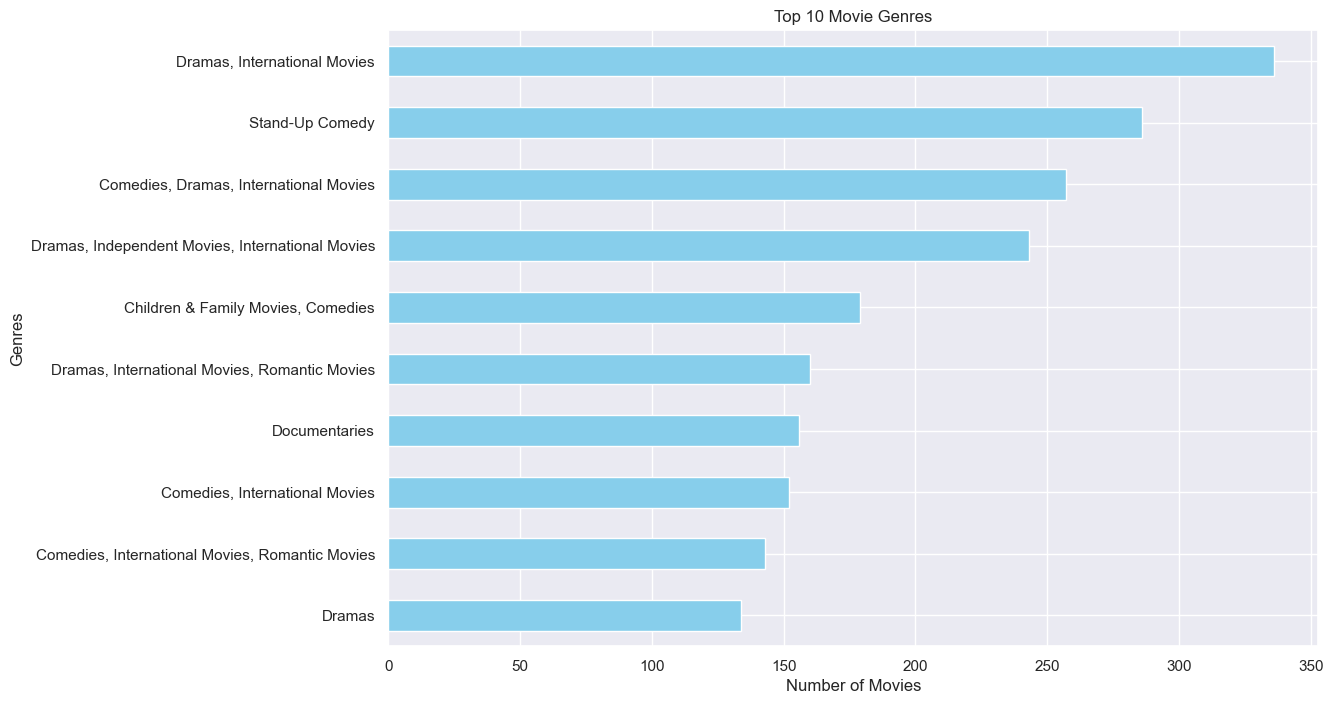

In [36]:
#Top 10 Movie genres
plt.figure(figsize=(12, 8))  
data['listed_in'].value_counts().head(10).sort_values(ascending=True).plot(
    kind='barh',
    color='skyblue',
    title='Top 10 Movie Genres'
)
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.show()

In [37]:
## Extracting the year from the dates
data['loading_year'] = data ['date_added'].dt.year
data['loading_year'] 

7       2021
8       2021
9       2021
12      2021
24      2021
        ... 
8801    2016
8802    2019
8804    2019
8805    2020
8806    2019
Name: loading_year, Length: 5336, dtype: int32

In [38]:
## Extracting the month from the date
data['loading_month'] = data ['date_added'].dt.month_name()
data['loading_month'] 

7       September
8       September
9       September
12      September
24      September
          ...    
8801        March
8802     November
8804     November
8805      January
8806        March
Name: loading_month, Length: 5336, dtype: object

In [39]:
# A tabled comparison between loading year and type
pd.crosstab(data.type, data.loading_year)


loading_year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
type,,,,,,,,,,,,,,
Movie,1,2,1,13,3,6,14,47,197,704,1085,1236,1151,729
TV Show,0,0,0,0,0,1,0,3,7,22,16,29,43,26


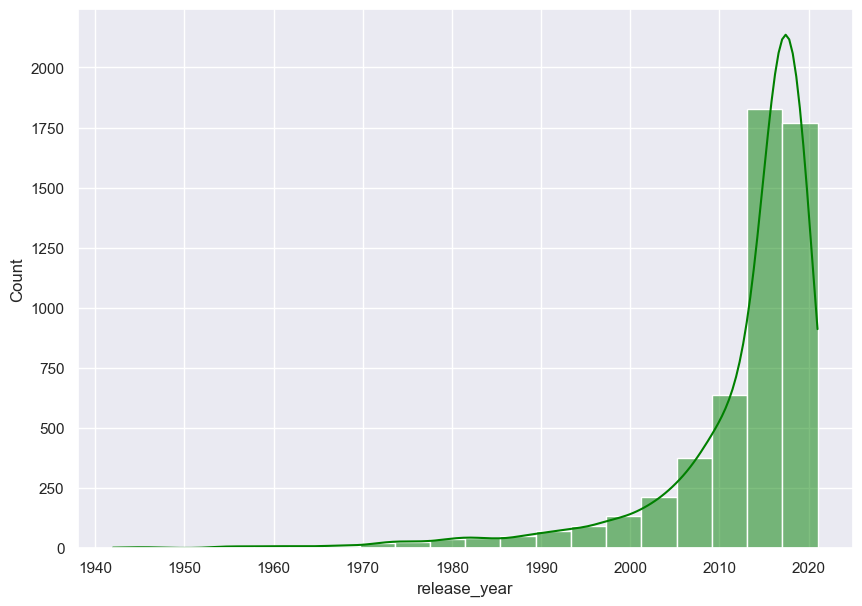

In [40]:
# Distribution of issuance release_year
plt.figure(figsize=(10, 7))
sns.histplot(data=data, x='release_year', bins=20, kde=True, color='green')
plt.show()

In [41]:
data[['loading_year','release_year']]

,loading_year,release_year
7,2021,1993
8,2021,2021
9,2021,2021
12,2021,2021
24,2021,1998
...,...,...
8801,2016,2015
8802,2019,2007
8804,2019,2009
8805,2020,2006


<Axes: xlabel='loading_year', ylabel='Count'>

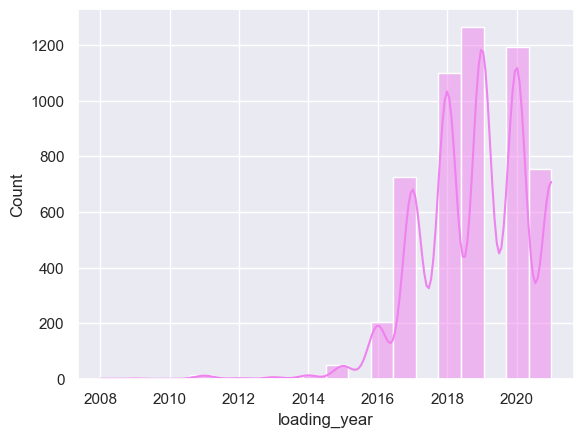

In [42]:
# Distribution of issuance loading_year
sns.histplot(data=data, x='loading_year', bins=20, kde=True, color='violet')

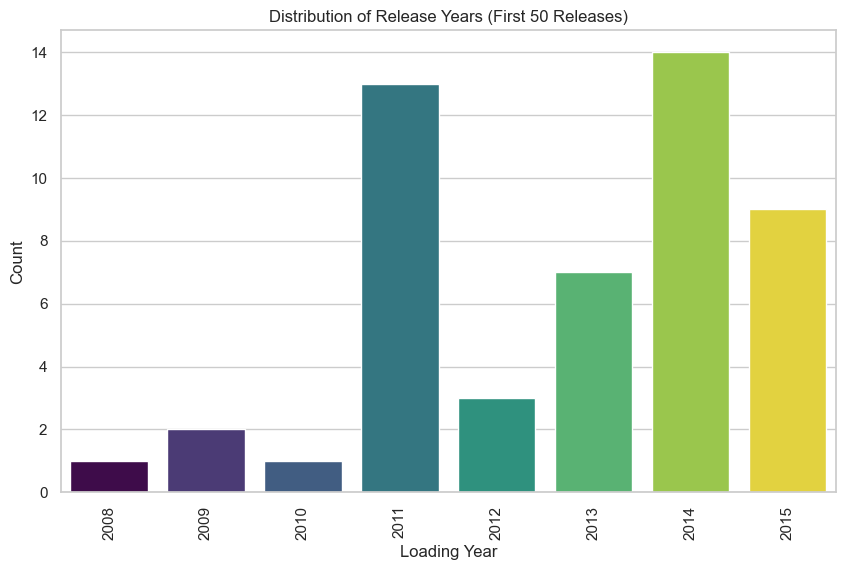

In [43]:
# Distribution of years in the first 50 releases
data_temp = data['loading_year'].sort_values().head(50)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x=data_temp, hue=data_temp, palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.title('Distribution of Release Years (First 50 Releases)')
plt.xlabel('Loading Year')
plt.ylabel('Count')
plt.show()

In [44]:
data.head

<bound method NDFrame.head of      show_id     type                          title             director  \
7         s8    Movie                        Sankofa         Haile Gerima   
8         s9  TV Show  The Great British Baking Show      Andy Devonshire   
9        s10    Movie                   The Starling       Theodore Melfi   
12       s13    Movie                   Je Suis Karl  Christian Schwochow   
24       s25    Movie                          Jeans           S. Shankar   
...      ...      ...                            ...                  ...   
8801   s8802    Movie                        Zinzana      Majid Al Ansari   
8802   s8803    Movie                         Zodiac        David Fincher   
8804   s8805    Movie                     Zombieland      Ruben Fleischer   
8805   s8806    Movie                           Zoom         Peter Hewitt   
8806   s8807    Movie                         Zubaan          Mozez Singh   

                                             

<Axes: xlabel='type'>

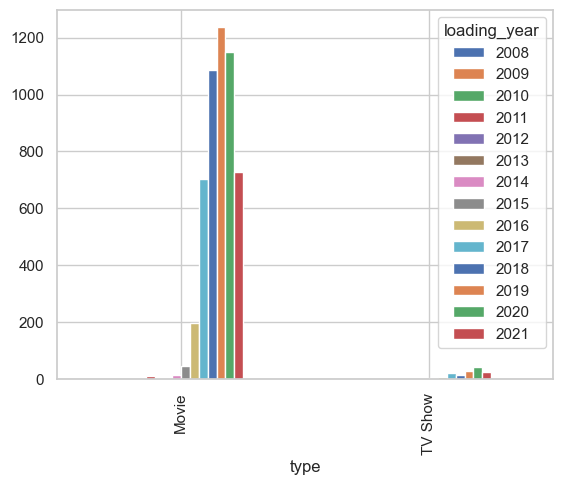

In [45]:
pd.crosstab(data.type ,data.loading_year).plot(kind='bar')

In [46]:
pd.crosstab(data.country ,data.loading_year)

loading_year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country,,,,,,,,,,,,,,
", France, Algeria",0,0,0,0,0,0,0,0,0,0,0,0,0,1
Argentina,0,0,0,0,0,0,0,0,2,6,13,4,7,3
"Argentina, Brazil, France, Poland, Germany, Denmark",0,0,0,0,0,0,0,0,0,0,1,0,0,0
"Argentina, Chile",0,0,0,0,0,0,0,0,0,0,1,0,0,1
"Argentina, Chile, Peru",0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Uruguay, Guatemala",0,0,0,0,0,0,0,0,0,0,0,1,0,0
"Uruguay, Spain, Mexico",0,0,0,0,0,0,0,0,0,0,0,1,0,0
Venezuela,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [47]:
data['director'].value_counts()

director
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
                          ..
Danny Cannon               1
Mana Yasuda                1
Gupse Özay                 1
Jim Mickle                 1
Mozez Singh                1
Name: count, Length: 3947, dtype: int64

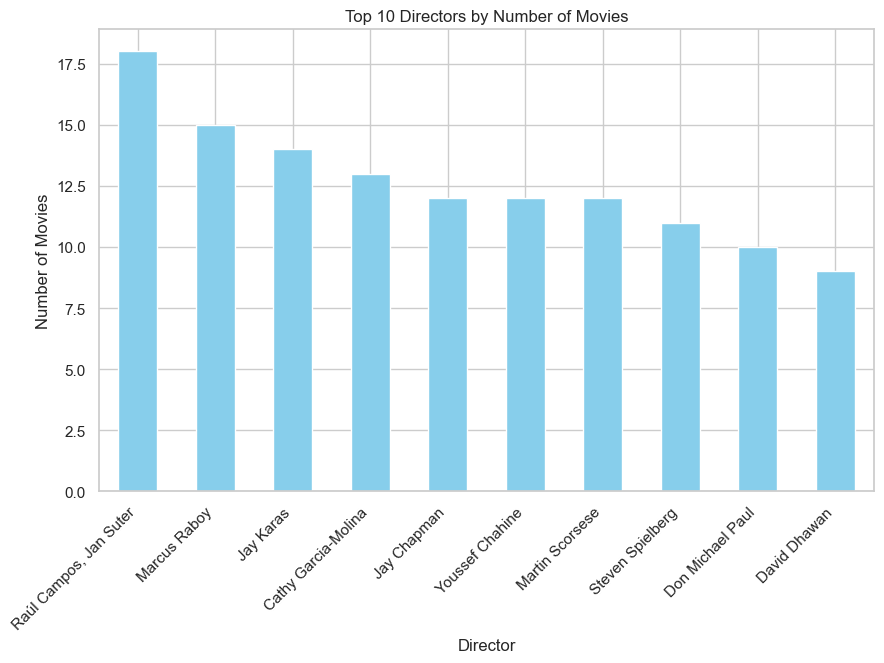

In [48]:
# Get the top 10 directors with the most movies
top_directors = data['director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016')])

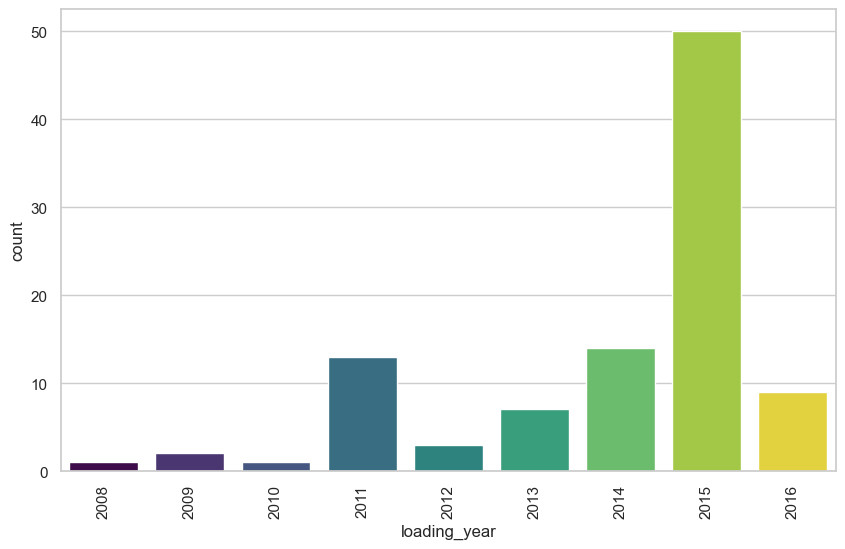

In [49]:
data_temp=data['loading_year'].sort_values().head(100)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x=data_temp, hue=data_temp, palette='viridis', legend=False)
plt.xticks(rotation=90)

In [50]:
# Group the data by "cast" and count the number of ratings for each cast member
group_bydata = data.groupby("cast")["rating"].count()
group_bydata = group_bydata.sort_values(ascending=False)
group_bydata

cast
Samuel West                                                                                                                                                                10
Jeff Dunham                                                                                                                                                                 7
Kevin Hart                                                                                                                                                                  6
Bill Burr                                                                                                                                                                   5
Jim Gaffigan                                                                                                                                                                5
                                                                                                                             

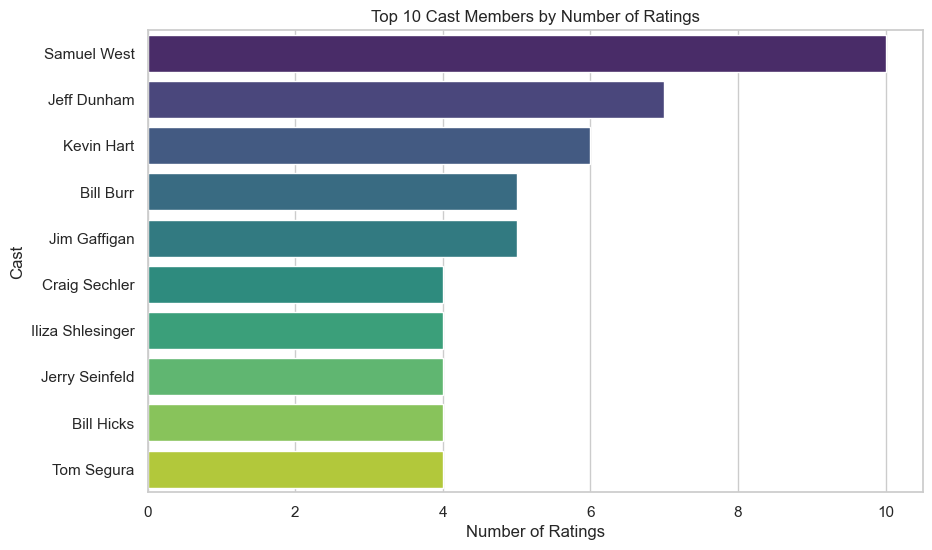

In [51]:
group_bydata = data.groupby('cast')['rating'].count().sort_values(ascending=False).head(10)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=group_bydata.values, y=group_bydata.index, hue=group_bydata.index, palette='viridis', dodge=False)
plt.title('Top 10 Cast Members by Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Cast')
plt.legend([],[], frameon=False)
plt.show()

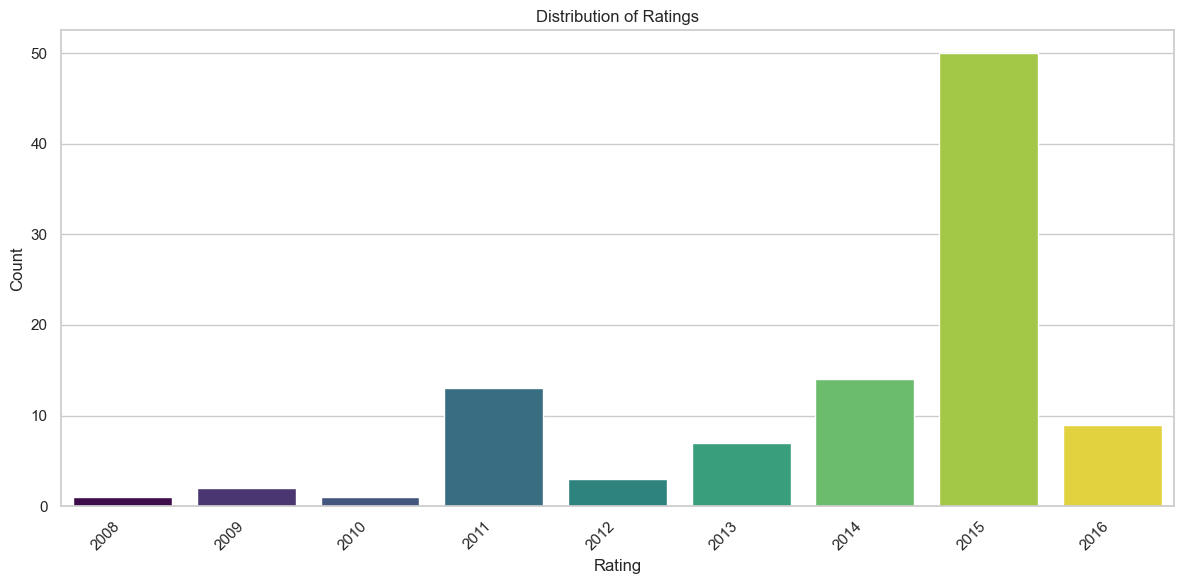

In [52]:
plt.figure(figsize=(12, 6))
sns.countplot(x=data_temp, hue=data_temp, palette='viridis', legend=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Build a Recommendation System one can filter a search with through director or genre

In [54]:
def recommend_movies(genre=None, director=None):
    recommendations = data
    if genre:
        recommendations = recommendations[recommendations['listed_in'].str.contains(genre, case=False, na=False)]
    if director:
        recommendations = recommendations[recommendations['director'].str.contains(director, case=False, na=False)]
    if not recommendations.empty:
        return recommendations[['title', 'director', 'listed_in', 'release_year', 'rating']].head(10)
    else:
        return "No movies found matching your preferences."
print("Welcome to the Movie Recommendation System!")
print("You can filter movies by Genre or Director (or both).")
user_genre = input("Enter your preferred genre (or press Enter to skip): ")
user_director = input("Enter your preferred director (or press Enter to skip): ")
recommendations = recommend_movies(genre=user_genre, director=user_director)
print("\nRecommended Movies:")
print(recommendations)

Welcome to the Movie Recommendation System!
You can filter movies by Genre or Director (or both).


Enter your preferred genre (or press Enter to skip):  drama
Enter your preferred director (or press Enter to skip):  



Recommended Movies:
                    title                    director  \
7                 Sankofa                Haile Gerima   
9            The Starling              Theodore Melfi   
12           Je Suis Karl         Christian Schwochow   
38    Birth of the Dragon                George Nolfi   
41                   Jaws            Steven Spielberg   
42                 Jaws 2              Jeannot Szwarc   
48           Training Day               Antoine Fuqua   
73           King of Boys                Kemi Adetiba   
84   Omo Ghetto: the Saga  JJC Skillz, Funke Akindele   
105      Angamaly Diaries        Lijo Jose Pellissery   

                                            listed_in  release_year rating  
7    Dramas, Independent Movies, International Movies          1993  TV-MA  
9                                    Comedies, Dramas          2021  PG-13  
12                       Dramas, International Movies          2021  TV-MA  
38                         Action & Adventu